In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
pd.options.display.max_columns = 999

In [2]:
Member = pd.read_csv('91APP_MemberData.csv', sep=',')

In [3]:
Member

,MemberID,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,MemberCardLevel
0,YM7ovErrjSwQ3UQrVw/zk7iX4/JHGdSBMgw738EDjSM=,NaN,2015-04-01 10:32:30.267,Female,2001-01-01,True,False,True,True,10
1,fMRldx5zPGsEfCe3gvMKLmM6alj+dIwV+rmkisf1bo8=,iOSApp,2016-06-26 19:13:01.127,NaN,1900-01-01,True,True,True,True,10
2,sq6A9cXpkm6osmubTCLs8bWeANzqL5qGj9eHJszdQSU=,iOSApp,2016-03-05 11:23:56,Female,1993-10-30,True,True,True,True,10
3,sS9Q1heArZei8b8QTdf733lvUfRshbKTYAi7ROO7qdQ=,iOSApp,2016-06-24 23:40:32.037,Female,1981-11-11,True,True,True,True,10
4,5zctnMgeBBnl88Ncab+TgtLtTv4IKqEqHZOVDdMbzp0=,iOSApp,2016-12-22 12:23:56.873,Female,1988-08-11,True,True,True,True,30
...,...,...,...,...,...,...,...,...,...,...
377155,w0i4G85XFKEky/bpn55HlByHA4NOGhOAPPNWAk8M5tI=,LocationWizard,2021-04-26 21:01:37.063,Female,1994-07-02,True,True,True,True,10
377156,PEvidK1TyFrwLHZNsIFOgARdgpHcXcbG4yNGXt478i4=,LocationWizard,2021-04-27 15:49:26.707,Female,1994-06-23,True,True,True,True,10
377157,GmU/hTy6jEiykaLWPinEZc7p6aceGyFdOyJ2SYKwAG8=,AndroidApp,2021-04-28 08:32:41.713,NaN,1900-01-01,True,True,True,True,10
377158,z3Yleadqq4J6cgff4+QPo4Qsv6otpnTPe5f5wzbD7aw=,Web,2021-04-28 23:46:48.033,NaN,1900-01-01,False,True,True,True,10


In [4]:
Order = pd.read_csv('91APP_OrderData.csv', sep=',')

/Users/terrylu/.conda/envs/untitled/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Order

,MemberID,TradesGroupCode,TradesDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status
0,jy5E0ck6eb55UMjTCL5PCitQMn+Nf/6DfmDa+zEPtz0=,TG200831S00444,2020-08-31 16:20:37.610,OfficialECom,iOSApp,ApplePay,Home,5,5,3579.0,4540,-961.0,-861,-100.0,0,Fail
1,V7au9CyyUt7G/v00BSUQnFrxkX6aiPUrcrvUhtscl4Q=,TG201108L01031,2020-11-08 10:25:47.760,OfficialECom,iOSApp,ApplePay,Home,2,2,1280.0,1380,-100.0,0,-100.0,0,Finish
2,uxxqhgclE3hlIbm1JXmxgN0fRR57p7kqfPAX4a1Yx/0=,TG201111J01896,2020-11-11 08:25:06.460,OfficialECom,iOSApp,ApplePay,FamilyPickup,2,2,1401.0,1580,-179.0,-79,-100.0,0,Finish
3,fVspFr6aMvCmNsRevQF5X83aGRRt6S6a8lWPt2q3W40=,TG201212H00386,2020-12-12 07:26:27.823,OfficialECom,iOSApp,ApplePay,FamilyPickup,2,2,1380.0,1480,-100.0,0,-100.0,0,Finish
4,llSeF2EfgDaxvHtiTO2EPgF0tDmo47650a+uvwKpVOk=,TG201213A00357,2020-12-13 00:04:34.483,OfficialECom,iOSApp,ApplePay,Home,1,1,1912.0,1912,0.0,0,0.0,0,Finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680369,LJ+V7WH45+fTM+PBaLIILZtdu/QcKWqYcaS/BJy/YDg=,TG210418H00522,2021-04-18 07:59:51.523,OfficialECom,MobileWeb,CreditCardInstallment,SevenElevenPickup,2,-2,-1730.0,-1830,100.0,0,100.0,0,Return
680370,LJ+V7WH45+fTM+PBaLIILZtdu/QcKWqYcaS/BJy/YDg=,TG210418H00522,2021-04-18 07:59:51.523,OfficialECom,MobileWeb,CreditCardInstallment,SevenElevenPickup,2,2,1730.0,1830,-100.0,0,-100.0,0,Finish
680371,/1+hC3g8AVBiK72b+9dyI/HBj6KmkXCCIqIh4UvRQnw=,TG210419X01621,2021-04-19 21:46:39.003,OfficialECom,MobileWeb,CreditCardInstallment,Home,1,1,1730.0,1880,-150.0,0,-150.0,0,Finish
680372,uI3o685Veco7fQX75gbLvbwqEOXLMfeG/SYc7o8Dunw=,TG210425S01321,2021-04-25 16:46:40.953,OfficialECom,AndroidApp,CreditCardInstallment,SevenElevenPickup,3,3,2780.0,3200,-420.0,-320,-100.0,0,New


### preprocessing

In [6]:
# clean Member
Member=Member.drop(["RegisterSourceTypeDef","IsEnableEmail","IsEnablePushNotification",'IsEnableShortMessage',"IsAppInstalled"],axis=1)

In [7]:
Member['Birthday']=pd.to_datetime(Member['Birthday'],format='%Y-%m-%d',errors="coerce")
Member['Birthday']=Member['Birthday'].fillna("1990-01-01")

In [8]:
Member['Birthday']=pd.to_datetime(Member['Birthday'],format='%Y-%m-%d')

In [9]:
now = pd.Timestamp('now')

In [10]:
Member['age'] =(now - Member['Birthday']).astype('<m8[Y]')

In [11]:
bins= [0,20,30,40,65,100,200]
labels = ['Teen','junior','senior','middle-aged','elder',"Non"]
Member['age_group'] = pd.cut(Member['age'], bins=bins, labels=labels, right=False)

In [12]:
Member['Gender']=Member['Gender'].fillna("No_gender")

In [13]:
gender=pd.get_dummies(Member['Gender'])

In [14]:
level=pd.get_dummies(Member['MemberCardLevel'],prefix="Member_level_")

In [15]:
age=pd.get_dummies(Member['age_group'])

In [16]:
Member_clean=pd.concat([Member['MemberID'],gender,age,level],axis=1)

In [17]:
Member_clean

,MemberID,Female,Male,No_gender,Teen,junior,senior,middle-aged,elder,Non,Member_level__0,Member_level__10,Member_level__20,Member_level__30,Member_level__40
0,YM7ovErrjSwQ3UQrVw/zk7iX4/JHGdSBMgw738EDjSM=,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,fMRldx5zPGsEfCe3gvMKLmM6alj+dIwV+rmkisf1bo8=,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,sq6A9cXpkm6osmubTCLs8bWeANzqL5qGj9eHJszdQSU=,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,sS9Q1heArZei8b8QTdf733lvUfRshbKTYAi7ROO7qdQ=,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5zctnMgeBBnl88Ncab+TgtLtTv4IKqEqHZOVDdMbzp0=,1,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377155,w0i4G85XFKEky/bpn55HlByHA4NOGhOAPPNWAk8M5tI=,1,0,0,0,1,0,0,0,0,0,1,0,0,0
377156,PEvidK1TyFrwLHZNsIFOgARdgpHcXcbG4yNGXt478i4=,1,0,0,0,1,0,0,0,0,0,1,0,0,0
377157,GmU/hTy6jEiykaLWPinEZc7p6aceGyFdOyJ2SYKwAG8=,0,0,1,0,0,0,0,0,1,0,1,0,0,0
377158,z3Yleadqq4J6cgff4+QPo4Qsv6otpnTPe5f5wzbD7aw=,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [18]:
# clean Order
Order=Order.drop(["PaymentType","ShippingType"],axis=1)

In [19]:
Order['TradesDateTime']=pd.to_datetime(Order['TradesDateTime'])

In [20]:
Order=Order[Order['TradesDateTime']>= "2016-01-01"]

In [21]:
Order=Order[Order["Status"]=='Finish']

In [22]:
Order=Order.drop(["TradesDateTime","ChannelDetail","TsCount","TotalPrice","TotalDiscount","Status","TradesGroupCode"],axis=1)

In [23]:
Order["TotalPromotionDiscount"]=Order["TotalPromotionDiscount"]*(-1)
Order["TotalCouponDiscount"]=Order["TotalCouponDiscount"]*(-1)
Order["TotalLoyaltyDiscount"]=Order["TotalLoyaltyDiscount"]*(-1)

In [24]:
Order['ChannelType']=Order['ChannelType'].apply(lambda x : "Pos" if x == "LocationWizard" else x)

In [25]:
Order=Order.groupby(["MemberID","ChannelType"]).sum().reset_index()

In [26]:
offline=Order[Order['ChannelType']=="Pos"]
online=Order[Order['ChannelType']=="OfficialECom"]

In [27]:
offline=offline.drop("ChannelType",axis=1)
online=online.drop("ChannelType",axis=1)

In [28]:
Order_clean=pd.merge(offline,online,how="outer",on="MemberID",suffixes=("_offline","_online")).fillna(0)

In [29]:
Order_clean

,MemberID,Qty_offline,TotalSalesAmount_offline,TotalPromotionDiscount_offline,TotalCouponDiscount_offline,TotalLoyaltyDiscount_offline,Qty_online,TotalSalesAmount_online,TotalPromotionDiscount_online,TotalCouponDiscount_online,TotalLoyaltyDiscount_online
0,++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,5.0,3580.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
1,++2Sw/YbIovLROVPDc+eVjbEdn6fTeg7niPBE/eJJKo=,1.0,1380.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,++6ZXiIdakH+77WllacG4cehkRZkwBnSIX2XvAroTko=,6.0,3758.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,++6bo8s3RbG5E3/Flzz1bg7Q7D3rdOd00L7AXTUHynU=,3.0,3359.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,++8NpYVoqyjmc8mROiPMlX/2J8JlOghaysSF3qbYCVE=,10.0,10836.0,244.0,0.0,0.0,5.0,3002.0,158.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
216517,zzuyFTH0qXj2h9ABnGbVDa5JG0S/HP8vz9VVJjGTbw4=,0.0,0.0,0.0,0.0,0.0,1.0,1280.0,100.0,0.0,0.0
216518,zzvTsLQAKUueMvz+vx/YptKHZIMMEu7nSWnkOiBhtR4=,0.0,0.0,0.0,0.0,0.0,2.0,1280.0,0.0,100.0,0.0
216519,zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,0.0,0.0,0.0,0.0,0.0,11.0,12753.0,207.0,200.0,0.0
216520,zzw9O6yOUvVbxgrvUGCnmjjacARx/bQ/12aZDz27TbE=,0.0,0.0,0.0,0.0,0.0,2.0,2660.0,0.0,100.0,0.0


### Merge Order data with Member data

In [30]:
df=pd.merge(Member_clean,Order_clean,how="left",on="MemberID").fillna(0)

In [31]:
df

,MemberID,Female,Male,No_gender,Teen,junior,senior,middle-aged,elder,Non,Member_level__0,Member_level__10,Member_level__20,Member_level__30,Member_level__40,Qty_offline,TotalSalesAmount_offline,TotalPromotionDiscount_offline,TotalCouponDiscount_offline,TotalLoyaltyDiscount_offline,Qty_online,TotalSalesAmount_online,TotalPromotionDiscount_online,TotalCouponDiscount_online,TotalLoyaltyDiscount_online
0,YM7ovErrjSwQ3UQrVw/zk7iX4/JHGdSBMgw738EDjSM=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1280.0,0.0,200.0,0.0
1,fMRldx5zPGsEfCe3gvMKLmM6alj+dIwV+rmkisf1bo8=,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sq6A9cXpkm6osmubTCLs8bWeANzqL5qGj9eHJszdQSU=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,13.0,17880.0,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sS9Q1heArZei8b8QTdf733lvUfRshbKTYAi7ROO7qdQ=,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5zctnMgeBBnl88Ncab+TgtLtTv4IKqEqHZOVDdMbzp0=,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,40.0,32642.0,7143.0,2554.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377155,w0i4G85XFKEky/bpn55HlByHA4NOGhOAPPNWAk8M5tI=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,3180.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
377156,PEvidK1TyFrwLHZNsIFOgARdgpHcXcbG4yNGXt478i4=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,5.0,5190.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0
377157,GmU/hTy6jEiykaLWPinEZc7p6aceGyFdOyJ2SYKwAG8=,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377158,z3Yleadqq4J6cgff4+QPo4Qsv6otpnTPe5f5wzbD7aw=,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
x=df.iloc[:,1:].values

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans_fit = KMeans(n_clusters = 4).fit(x)

In [35]:
cluster_labels = kmeans_fit.labels_

In [36]:
df["cluster"]=cluster_labels

In [37]:
df

,MemberID,Female,Male,No_gender,Teen,junior,senior,middle-aged,elder,Non,Member_level__0,Member_level__10,Member_level__20,Member_level__30,Member_level__40,Qty_offline,TotalSalesAmount_offline,TotalPromotionDiscount_offline,TotalCouponDiscount_offline,TotalLoyaltyDiscount_offline,Qty_online,TotalSalesAmount_online,TotalPromotionDiscount_online,TotalCouponDiscount_online,TotalLoyaltyDiscount_online,cluster
0,YM7ovErrjSwQ3UQrVw/zk7iX4/JHGdSBMgw738EDjSM=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1280.0,0.0,200.0,0.0,0
1,fMRldx5zPGsEfCe3gvMKLmM6alj+dIwV+rmkisf1bo8=,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,sq6A9cXpkm6osmubTCLs8bWeANzqL5qGj9eHJszdQSU=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,13.0,17880.0,1880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,sS9Q1heArZei8b8QTdf733lvUfRshbKTYAi7ROO7qdQ=,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5zctnMgeBBnl88Ncab+TgtLtTv4IKqEqHZOVDdMbzp0=,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,40.0,32642.0,7143.0,2554.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377155,w0i4G85XFKEky/bpn55HlByHA4NOGhOAPPNWAk8M5tI=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,3180.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0
377156,PEvidK1TyFrwLHZNsIFOgARdgpHcXcbG4yNGXt478i4=,1,0,0,0,1,0,0,0,0,0,1,0,0,0,5.0,5190.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0
377157,GmU/hTy6jEiykaLWPinEZc7p6aceGyFdOyJ2SYKwAG8=,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
377158,z3Yleadqq4J6cgff4+QPo4Qsv6otpnTPe5f5wzbD7aw=,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [38]:
df["cluster"].value_counts()

0    340195
3     19171
1     16881
2       913
Name: cluster, dtype: int64

In [39]:
# gender
Member["Gender"].value_counts()

No_gender    204811
Female       169250
Male           3099
Name: Gender, dtype: int64

In [40]:
Member['age_group'].value_counts()

Non            204556
senior          78621
junior          61319
middle-aged     28574
Teen             3944
elder             137
Name: age_group, dtype: int64

In [43]:
df.groupby("cluster").mean()

,Female,Male,No_gender,Teen,junior,senior,middle-aged,elder,Non,Member_level__0,Member_level__10,Member_level__20,Member_level__30,Member_level__40,Qty_offline,TotalSalesAmount_offline,TotalPromotionDiscount_offline,TotalCouponDiscount_offline,TotalLoyaltyDiscount_offline,Qty_online,TotalSalesAmount_online,TotalPromotionDiscount_online,TotalCouponDiscount_online,TotalLoyaltyDiscount_online
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,0.407440,0.008322,0.584238,0.010309,0.150540,0.188060,0.067150,0.000350,0.583571,0.000353,0.995350,0.003183,0.000159,0.000955,0.463217,438.823423,5.672538,9.362806,0.0,0.862400,851.733435,17.632093,22.715028,0.0
1,0.925478,0.008471,0.066051,0.016527,0.383567,0.400095,0.132753,0.000355,0.066584,0.000000,0.739411,0.220662,0.036431,0.003495,10.129021,10275.515135,117.807061,235.620165,0.0,1.536580,1289.549316,84.551152,38.605118,0.0
2,0.905805,0.008762,0.085433,0.008762,0.197152,0.481928,0.232202,0.002191,0.077766,0.000000,0.033954,0.102957,0.843373,0.019715,11.736035,10297.038335,60.802848,350.662651,0.0,64.503834,52595.330778,6473.801752,1603.394304,0.0
3,0.740233,0.006103,0.253664,0.007824,0.180011,0.388608,0.170935,0.000522,0.252100,0.000052,0.698086,0.250430,0.047989,0.003443,0.782171,751.391696,6.117834,16.993313,0.0,11.407856,10675.903083,440.833499,254.846591,0.0


In [44]:
# elbow method
kmeans_kwargs = {
 "init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

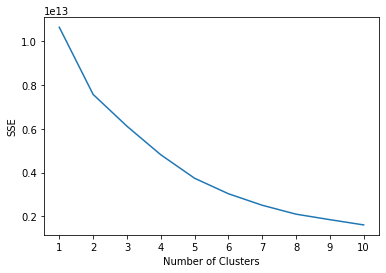

In [45]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [49]:
from sklearn.decomposition import TruncatedSVD

In [50]:
svd = TruncatedSVD(n_components=2)
vector_svd = svd.fit_transform(x)

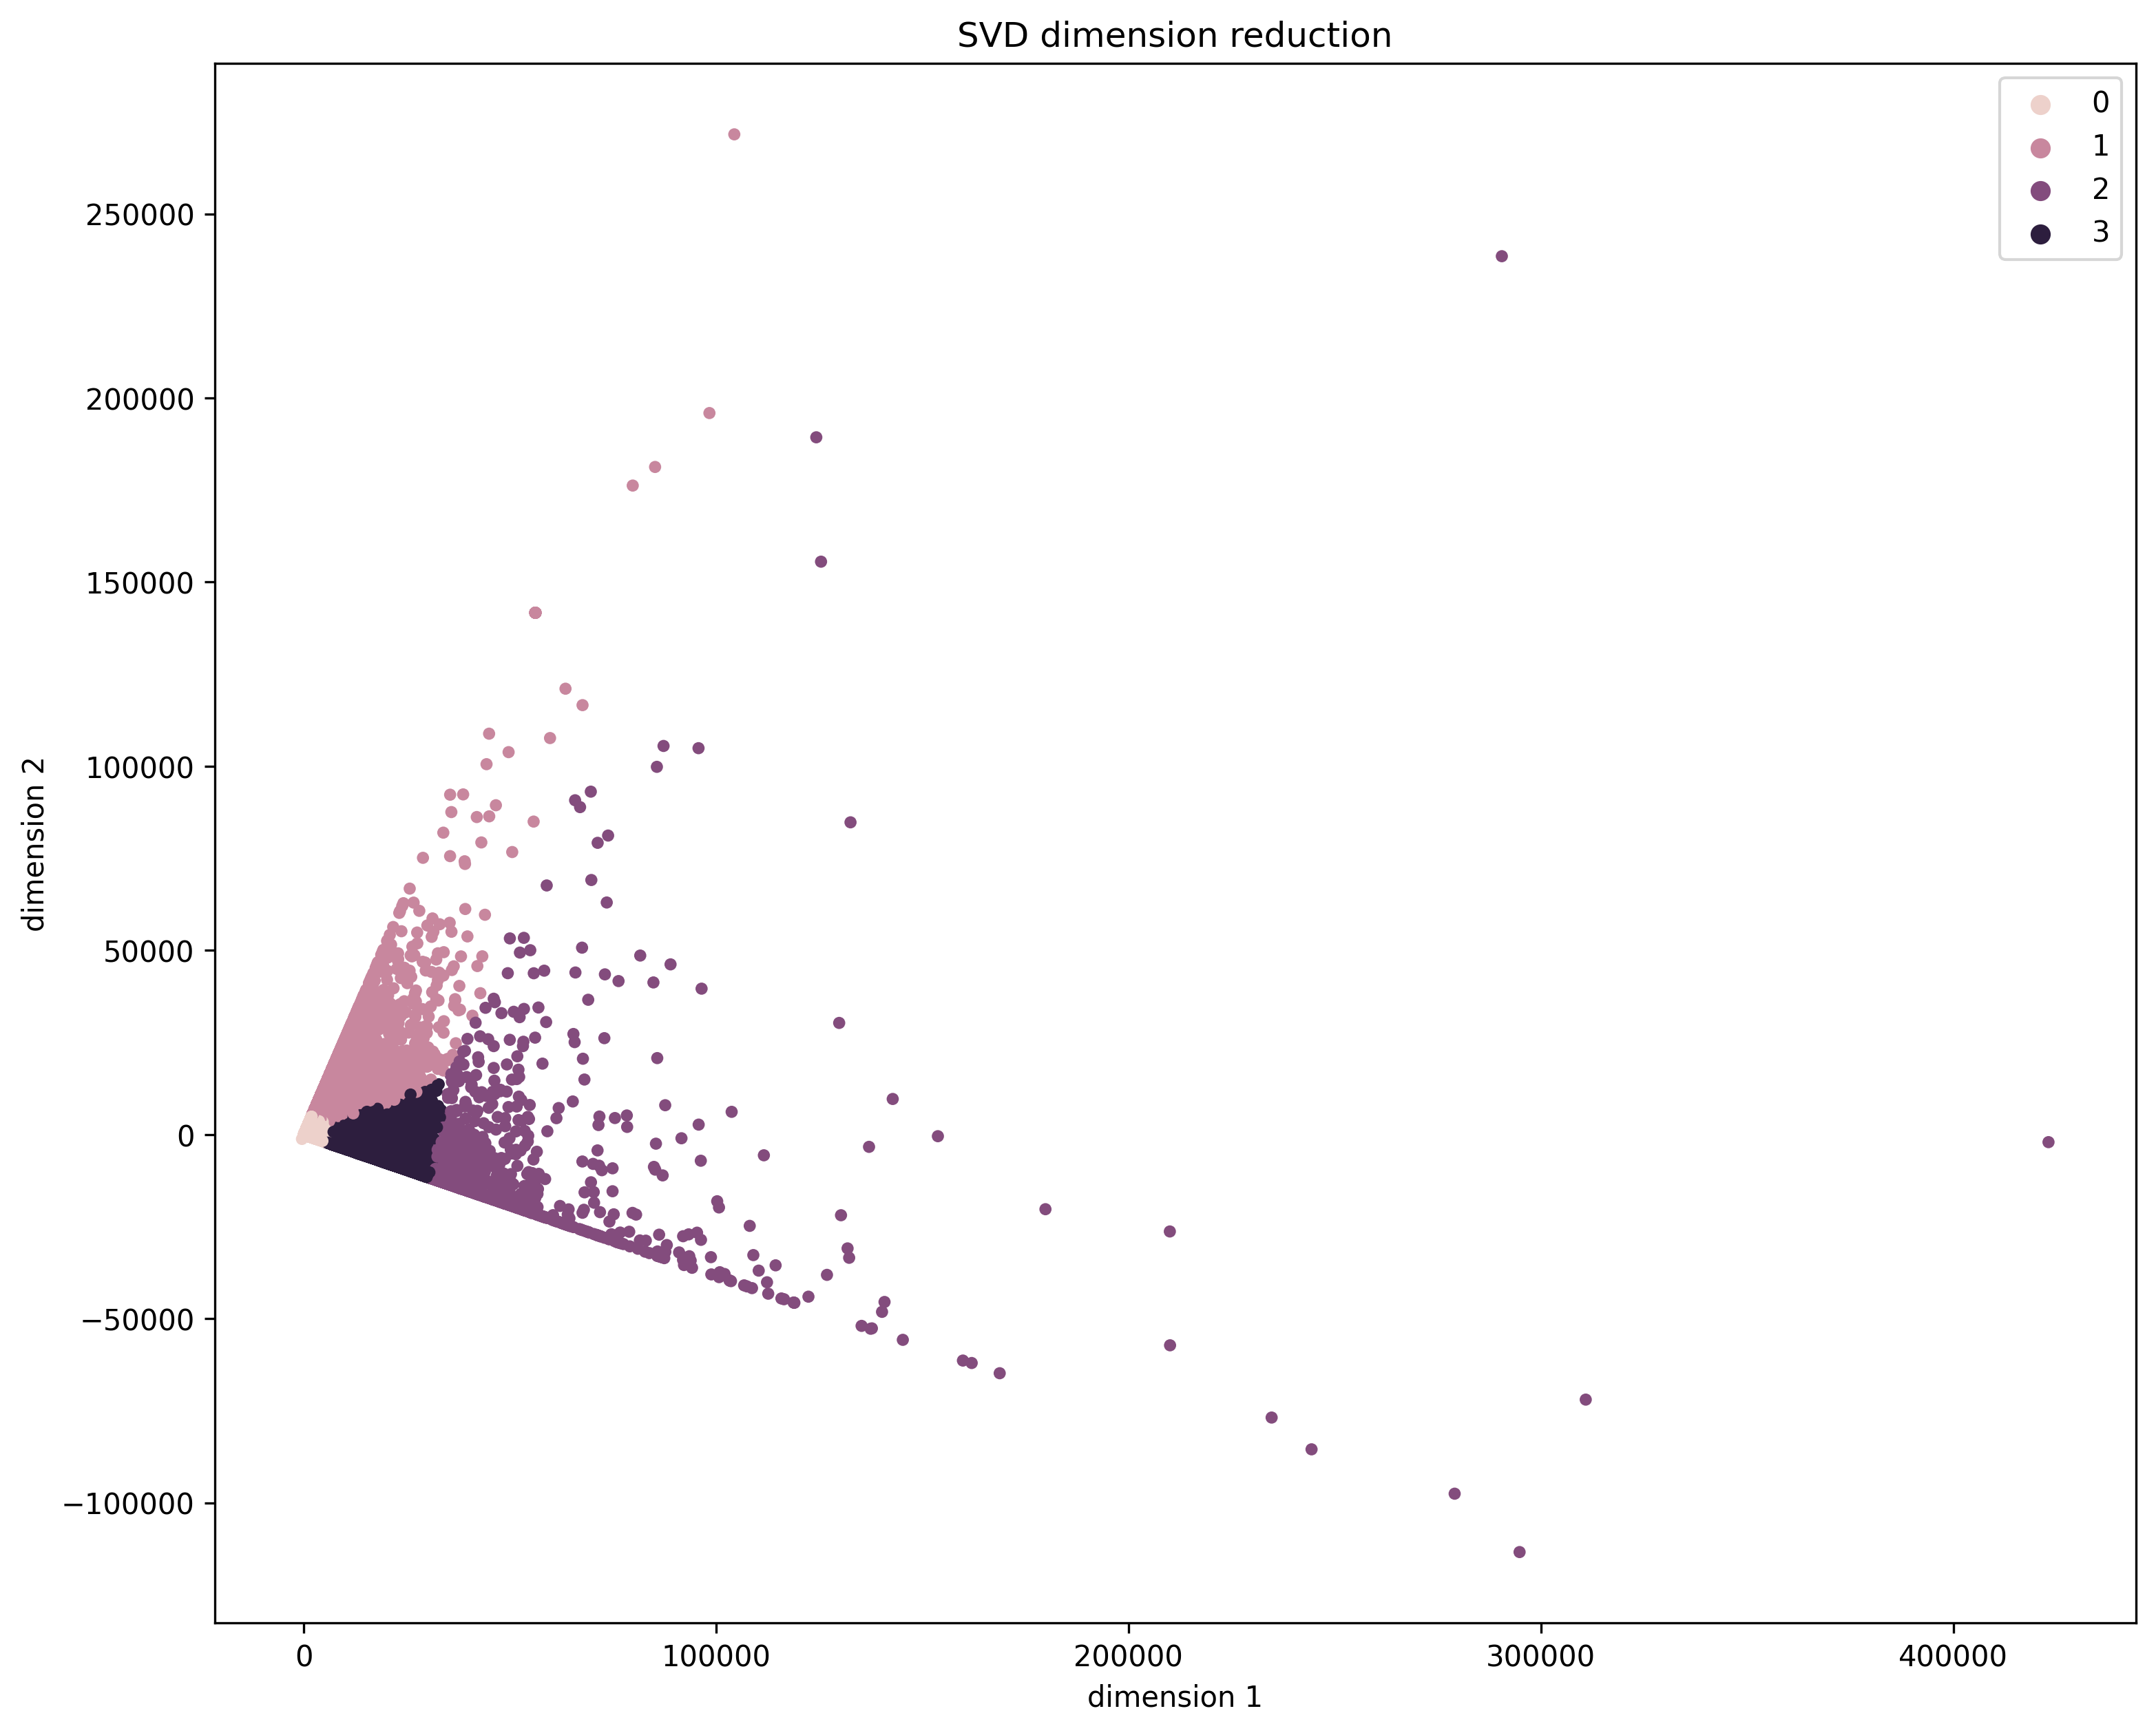

In [53]:
df2=pd.DataFrame(vector_svd )
df2['category']=df["cluster"]
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=0,y=1,hue='category',s=18,edgecolor="none",data=df2)
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('SVD dimension reduction')
ax.legend(loc='upper right')
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('TA grouping.png',dpi=300)  #存檔
plt.show()

### Make a classifier so the marketing strategy can work on each of group we predict

In [102]:
X=df.drop(["MemberID","cluster"],axis=1).values

In [103]:
label = df["cluster"].values

In [104]:
X.shape

(377160, 24)

In [105]:
label.shape

(377160,)

In [106]:
y = label_binarize(label, classes=[0,1,2,3]) 
n_classes = y.shape[1]
n_classes

4

In [107]:
train_y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
model=OneVsRestClassifier(RandomForestClassifier(random_state=123))
model.fit(x_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=123))

In [119]:
predicted_results=[]
expected_results=[]
expected_results.extend(y_test)
predicted_results.extend(model.predict(x_test))
# Show precision, recall, and F1 scores
# micro avg  F1 scores 
print(metrics.classification_report(expected_results,predicted_results))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68095
           1       0.99      0.99      0.99      3360
           2       1.00      0.93      0.96       169
           3       0.99      0.99      0.99      3808

   micro avg       1.00      1.00      1.00     75432
   macro avg       1.00      0.98      0.99     75432
weighted avg       1.00      1.00      1.00     75432
 samples avg       1.00      1.00      1.00     75432



/Users/terrylu/.conda/envs/untitled/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision score, micro-averaged over all classes: 1.00


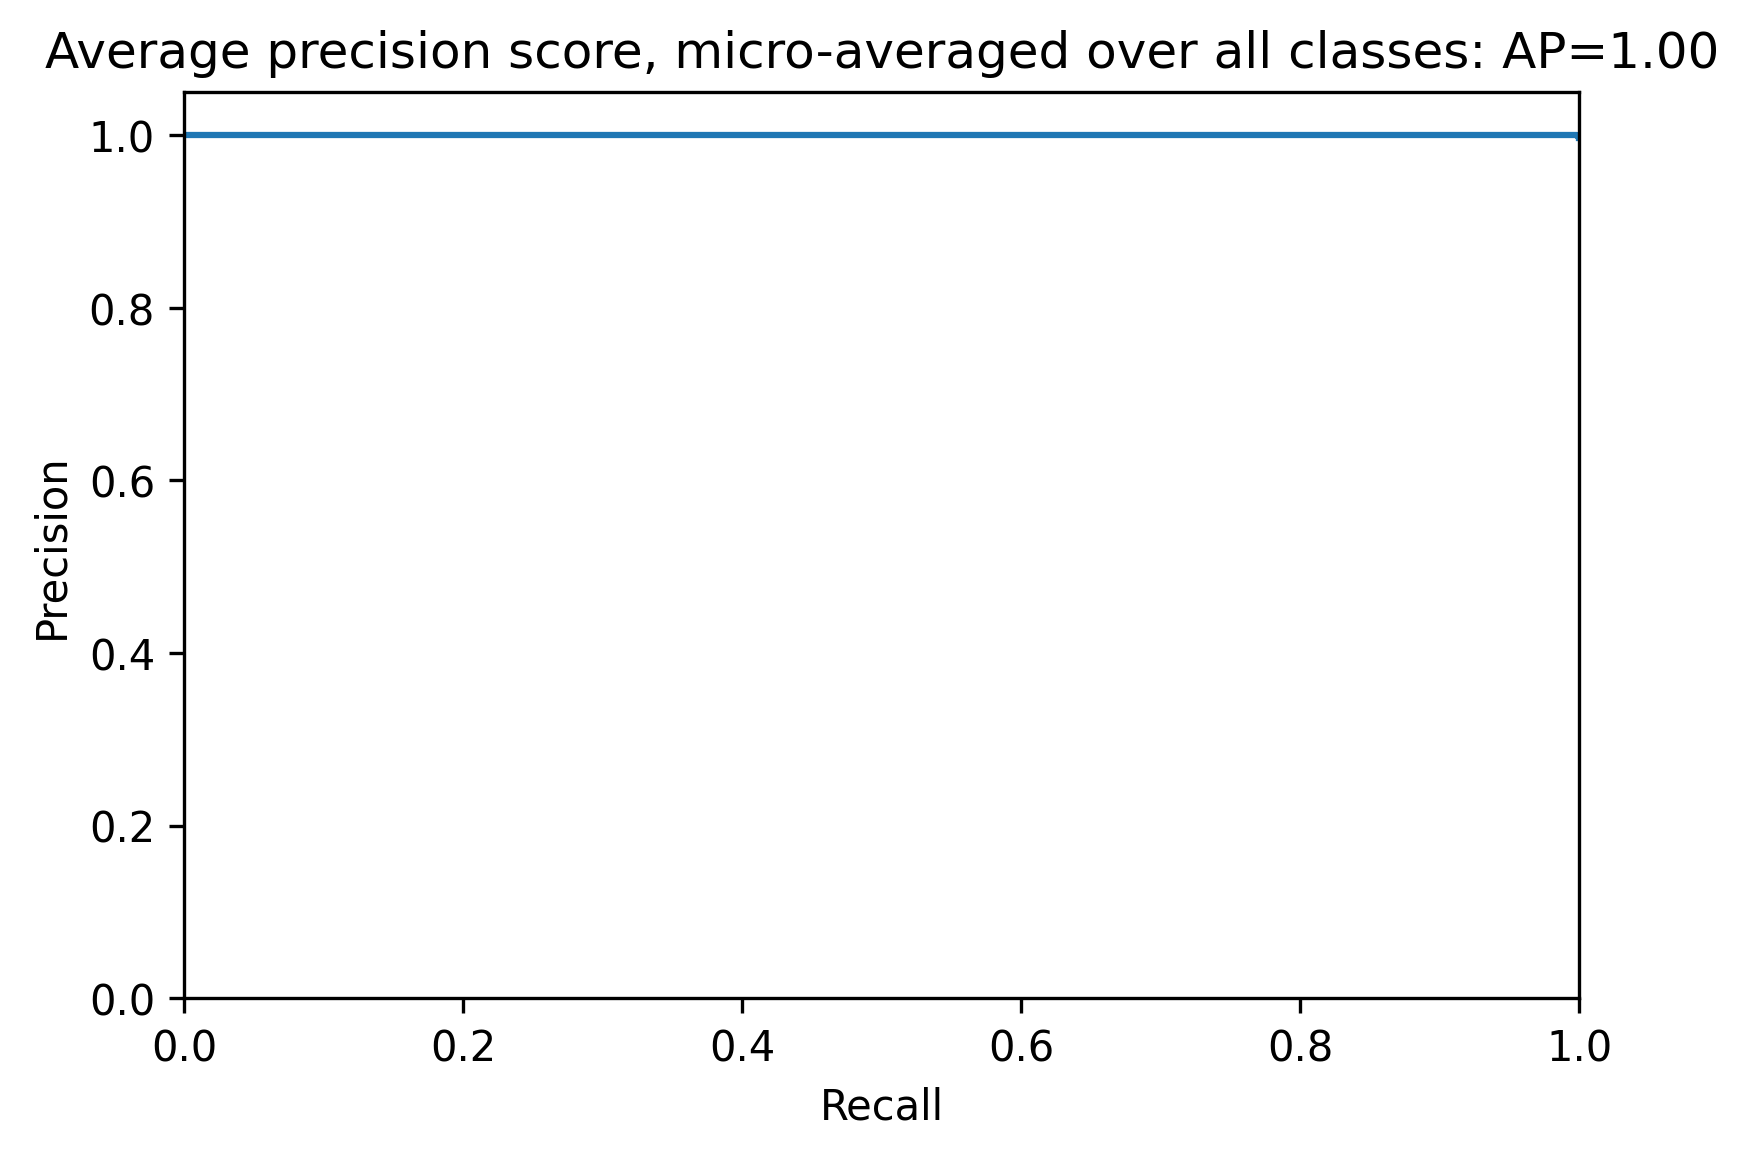

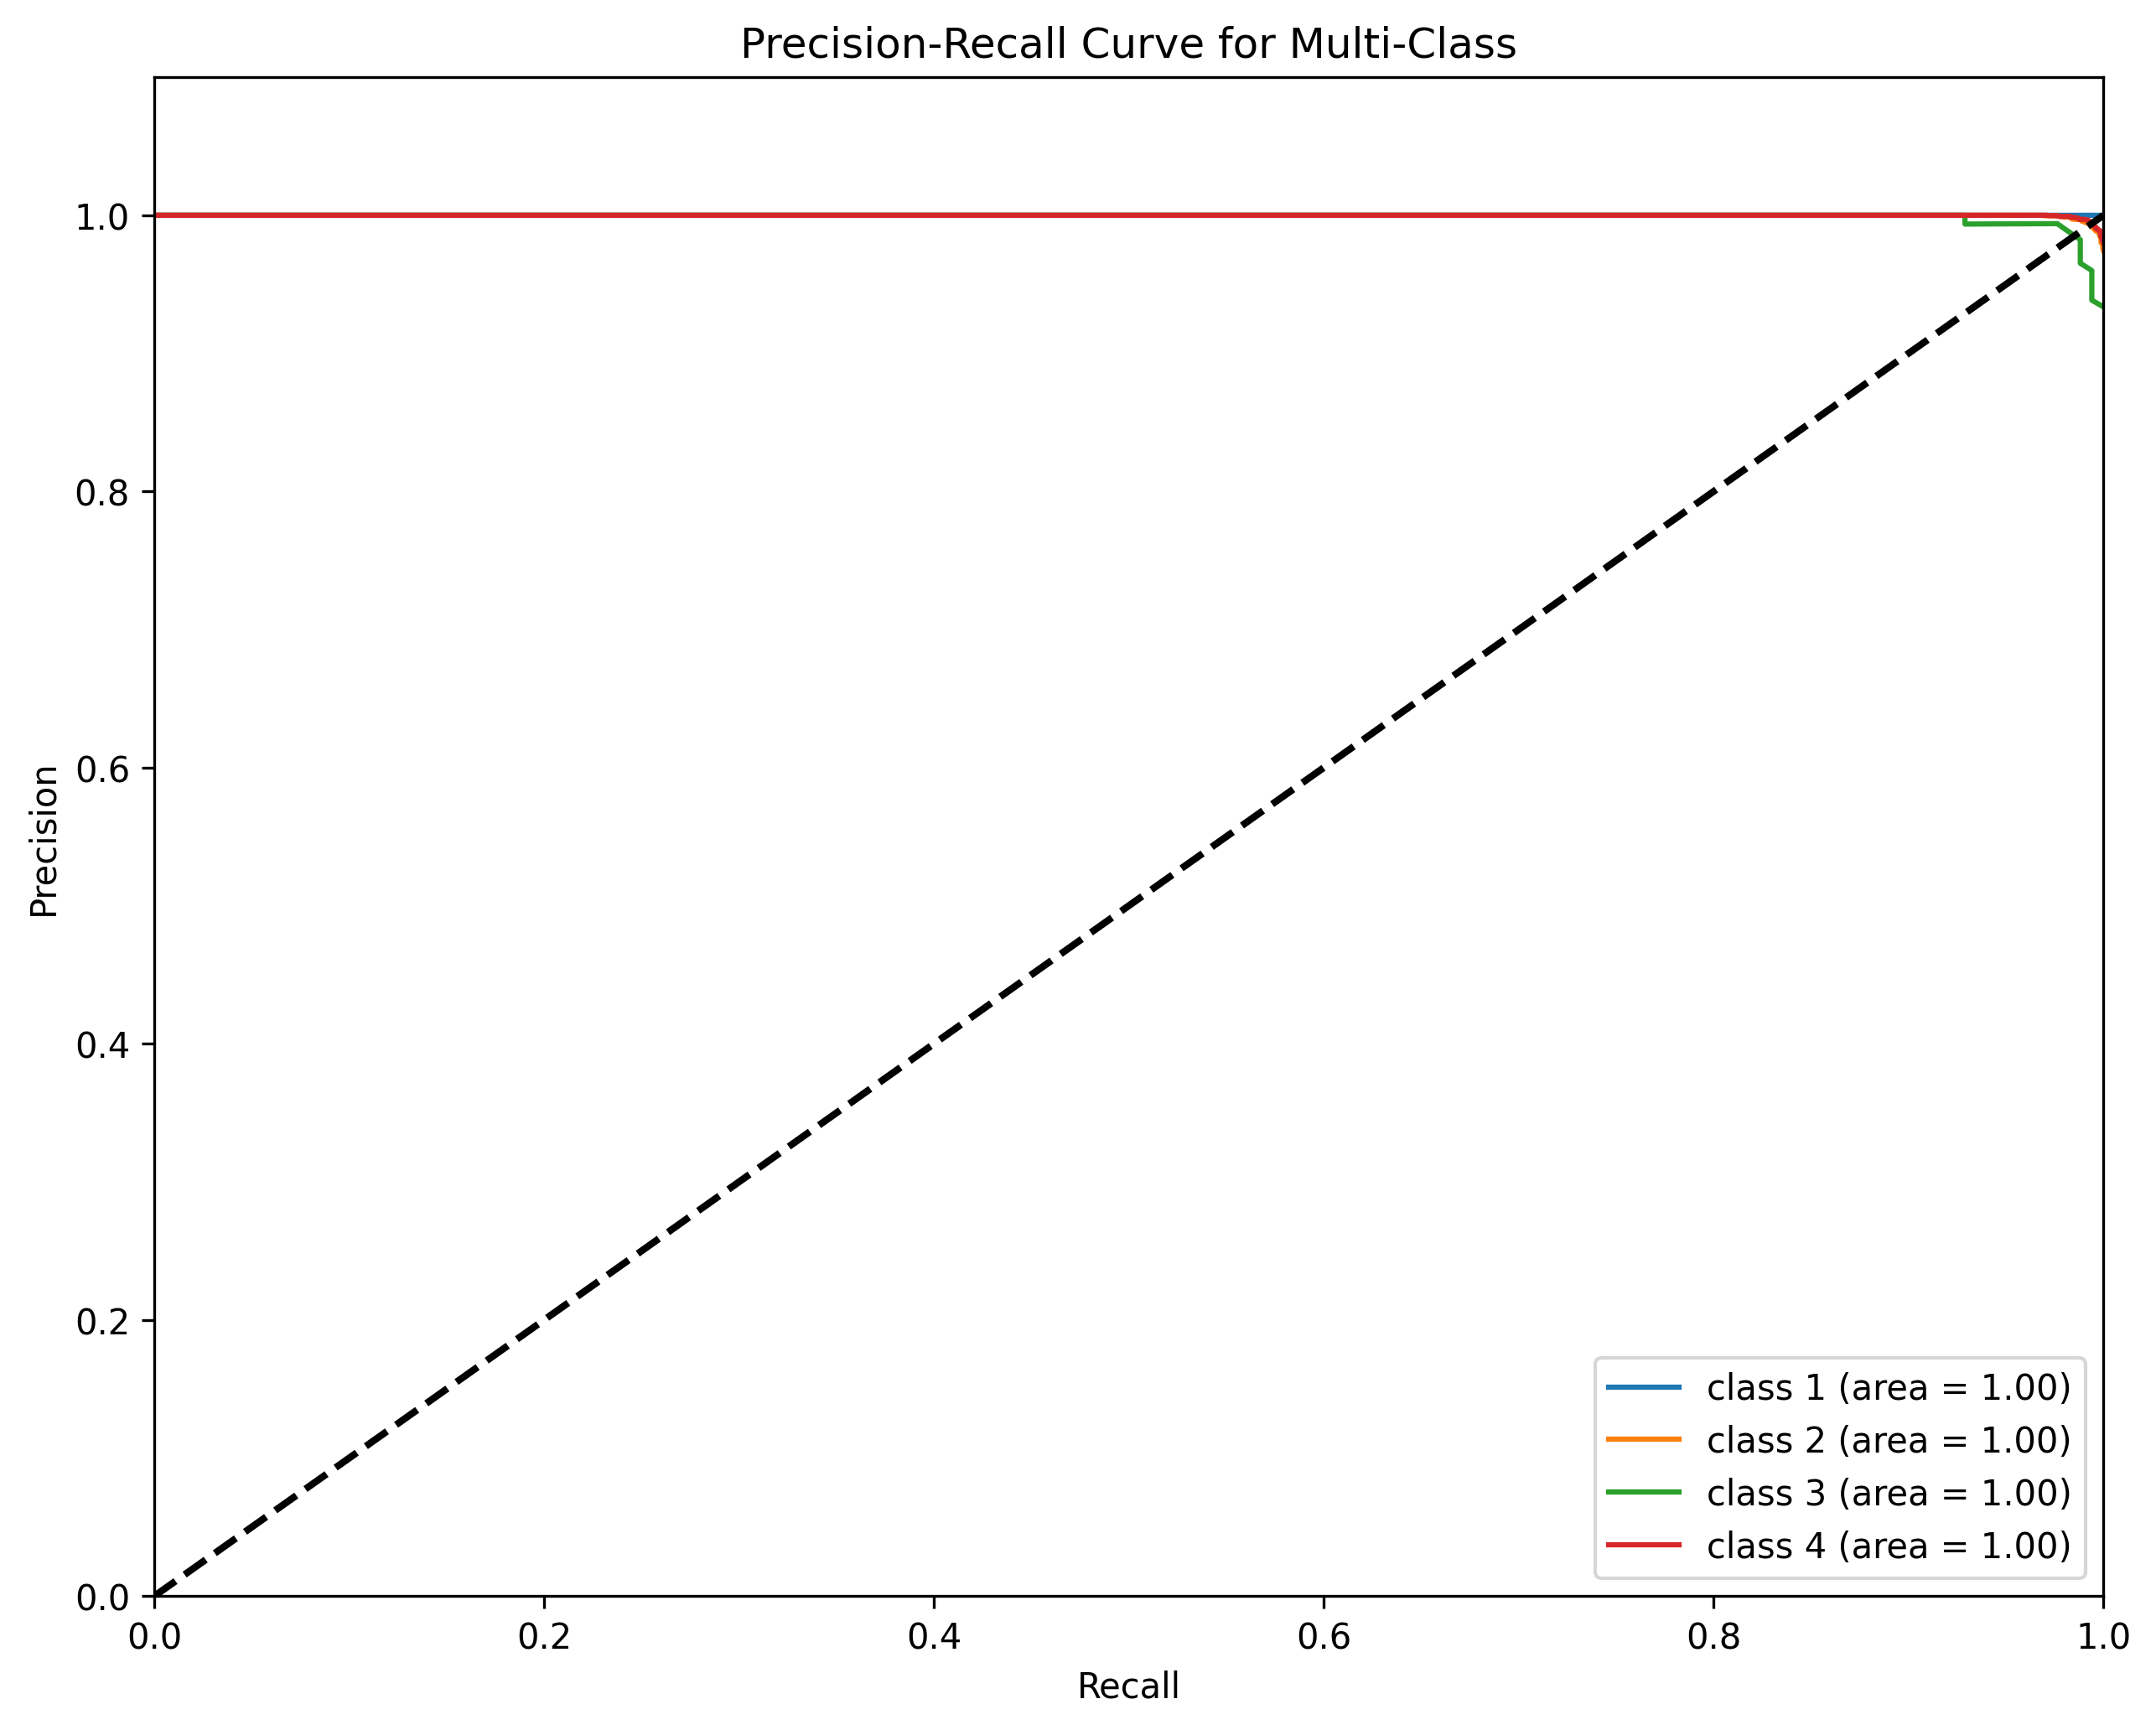

In [120]:
#plot precision recall curves
y_score = model.fit(x_train, y_train).predict_proba(x_test)
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='class {0} (area = {1:0.2f})'.format
    (i+1, average_precision[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class') 
plt.legend(loc="best")
plt.show()